## [예] 경기도에서 교통사망사고가 많은 5지역을 분석하여 도식화

(1) 발생지시도가 경기도 데이타셋 필터링

(2) 경기도내에서도 발생지시군구의 그룹핑

(3) 사망자수의 합계로 차트 만들기


In [64]:

%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글깨짐처리
font_loc = "c:/Windows/Fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_loc).get_name()
rc('font', family=font_name)


In [65]:
# 데이타 읽어오기
data=pd.read_csv('data/accidentdata.csv')
data



,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012050901,10,야간,수,1,1,0,0,0,...,단일로,기타단일로,승용차,대형,화물차,대형,1032000,1731688,127.853191,35.580719
1,2012,2012033013,32,주간,금,1,1,0,0,0,...,단일로,기타단일로,화물차,소형,특수차,경형,960392,1924378,127.052937,37.317615
2,2012,2012102620,55,야간,금,1,2,1,0,0,...,단일로,기타단일로,승용차,중형,승용차,소형,1045245,1799427,128.003224,36.190921
3,2012,2012062814,10,주간,목,1,1,0,0,0,...,단일로,기타단일로,화물차,대형,승용차,소형,992942,1915569,127.420426,37.238956
4,2012,2012061804,15,야간,월,1,1,0,0,0,...,기타/불명,기타/불명,화물차,대형,화물차,대형,1013547,1663287,127.648393,34.964371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14619,2014,2014070516,30,주간,토,1,1,0,0,0,...,단일로,기타단일로,승용차,중형,보행자,보행자,1111720,1805062,128.743266,36.236321
14620,2014,2014071218,20,야간,토,1,8,2,5,0,...,단일로,기타단일로,화물차,소형,승용차,소형,957496,1775019,127.028576,35.970994
14621,2014,2014071504,30,야간,화,2,6,2,2,0,...,단일로,기타단일로,승용차,중형,승용차,소형,1112317,1757467,128.743150,35.807242
14622,2014,2014071020,40,야간,목,1,3,0,2,0,...,단일로,기타단일로,화물차,소형,농기계,농기계,1047968,1725622,128.029069,35.525381


In [66]:
# (1) 발생지시도가 경기도인 필터링
data[data['발생지시도']=='경기']


,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
1,2012,2012033013,32,주간,금,1,1,0,0,0,...,단일로,기타단일로,화물차,소형,특수차,경형,960392,1924378,127.052937,37.317615
3,2012,2012062814,10,주간,목,1,1,0,0,0,...,단일로,기타단일로,화물차,대형,승용차,소형,992942,1915569,127.420426,37.238956
6,2012,2012053104,17,야간,목,1,2,1,0,0,...,단일로,기타단일로,승용차,소형,건설기계,건설기계,971512,1953274,127.177364,37.578407
13,2012,2012101602,45,야간,화,1,1,0,0,0,...,단일로,기타단일로,승용차,소형,특수차,대형,946961,1921288,126.901626,37.289021
14,2012,2012121404,50,야간,금,1,2,0,1,0,...,단일로,기타단일로,화물차,소형,화물차,대형,942679,1937985,126.852028,37.439262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14591,2014,2014052306,55,주간,금,1,10,1,3,5,...,단일로,기타단일로,승용차,중형,승합차,대형,936796,1925825,126.786568,37.329279
14594,2014,2014060510,50,주간,목,1,1,0,0,0,...,단일로,기타단일로,건설기계,건설기계,보행자,보행자,937764,1942780,126.796066,37.482162
14600,2014,2014061715,12,주간,화,1,1,0,0,0,...,단일로,기타단일로,승용차,소형,보행자,보행자,1000212,1943771,127.502398,37.493192
14603,2014,2014061920,48,야간,목,1,1,0,0,0,...,단일로,횡단보도상,화물차,소형,보행자,보행자,947126,1880495,126.906364,36.921331


In [67]:
# (2) 경기도내에서도 발생지시군구의 그룹핑
data[data['발생지시도']=='경기'].groupby('발생지시군구')

<IPython.core.display.Javascript object>


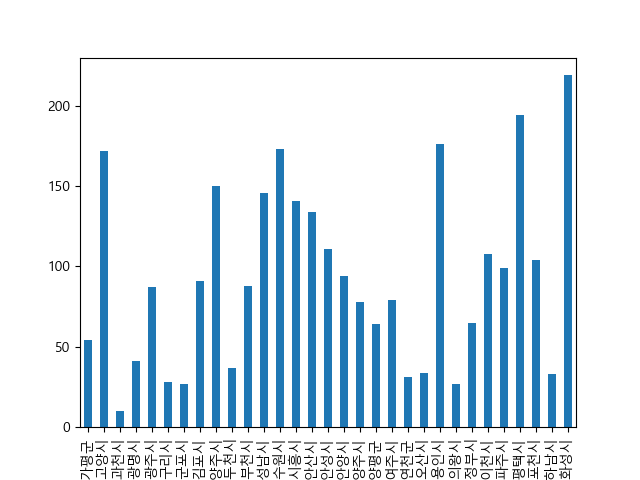

In [74]:
# (3) 사망자수의 합계로 차트 만들기

#temp = data[data['발생지시도']=='경기'].groupby('발생지시군구').sum()
#temp
#temp['사망자수'].plot(kind='bar')

temp = data[data['발생지시도']=='경기']
temp2 = temp.groupby('발생지시군구').sum()
temp2['사망자수'].plot(kind='bar')


In [69]:
# (4) 경기도 내에서 사망자 순 5개 지역 추출

temp.sort_values('사망자수', ascending=0).head(5)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
137,2012,2012112404,13,야간,토,5,6,1,0,0,...,단일로,기타단일로,승합차,대형,승용차,소형,967587,1895922,127.135722,37.061321
151,2012,2012070509,20,주간,목,5,10,3,2,0,...,단일로,기타단일로,승합차,소형,승용차,소형,953279,1909449,126.973644,37.182647
11717,2014,2014113000,20,야간,일,5,5,0,0,0,...,단일로,기타단일로,승용차,경형,화물차,중형,958995,1890598,127.039058,37.012849
13891,2014,2014051309,5,주간,화,4,7,3,0,0,...,단일로,기타단일로,승용차,대형,화물차,중형,938685,1960105,126.805033,37.638372
189,2012,2012032714,30,주간,화,4,9,5,0,0,...,단일로,터널안,승합차,소형,화물차,소형,986727,1959430,127.349566,37.634239


['고양시',
 '화성시',
 '용인시',
 '안성시',
 '김포시',
 '포천시',
 '평택시',
 '성남시',
 '오산시',
 '양주시',
 '남양주시',
 '연천군',
 '광명시',
 '이천시',
 '파주시',
 '구리시',
 '동두천시',
 '안산시',
 '부천시',
 '의정부시',
 '양평군',
 '하남시',
 '여주시',
 '시흥시',
 '가평군',
 '수원시',
 '과천시',
 '안양시',
 '의왕시',
 '군포시',
 '광주시']

In [71]:
\